In [ ]:
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/lenta.txt.zip

--2024-09-26 20:13:39--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/lenta.txt.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/lenta.txt.zip [following]
--2024-09-26 20:13:39--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/lenta.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5723675 (5.5M) [application/zip]
Saving to: ‘lenta.txt.zip’

lenta.txt.zip       100%[===================>]   5.46M  --.-KB/s    in 0.1s    

2024-09-26 20:13:39 (46.0 MB/s) - ‘lenta.txt.zip’ saved [57236

In [ ]:
!unzip lenta.txt.zip

Archive:  lenta.txt.zip
  inflating: lenta.txt               
  inflating: __MACOSX/._lenta.txt    


## Задание 1.

Посчитайте частоты для 5-грамм в корпусе lenta.txt. двумя способами:  
1) lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer  
2) lenta.txt -> word_tokene(preserve_line=True) - ngrammer  
    
Проанализируйте топ-20 самых частотных нграмм и проверьте есть ли различия?

Часть 1

In [301]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')
russian_stopwords = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [302]:
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize

with open('lenta.txt', 'r', encoding='utf-8') as file:
    corpus = file.read()

In [308]:
import re
sentences = sent_tokenize(corpus, language='russian')
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
tokenized_sentences = [[token.lower() for token in sentence if not re.match('\W+', token)] for sentence in tokenized_sentences  ]

In [309]:
def flatten(xss):
    return [x for xs in xss for x in xs]

In [312]:
five_grams_1 = flatten([list(ngrams(i, 5)) for i in tokenized_sentences])
freq_dist_1 = nltk.FreqDist(five_grams_1)

In [313]:
top_20_1 = freq_dist_1.most_common(20)
top_20_1

[(('риа', 'новости', 'со', 'ссылкой', 'на'), 400),
 (('сообщает', 'риа', 'новости', 'со', 'ссылкой'), 320),
 (('как', 'сообщили', 'риа', 'новости', 'в'), 196),
 (('как', 'сообщает', 'риа', 'новости', 'со'), 149),
 (('сообщает', 'интерфакс', 'со', 'ссылкой', 'на'), 142),
 (('сообщает', 'итар-тасс', 'со', 'ссылкой', 'на'), 118),
 (('об', 'этом', 'риа', 'новости', 'сообщили'), 113),
 (('об', 'этом', 'сообщает', 'риа', 'новости'), 104),
 (('этом', 'риа', 'новости', 'сообщили', 'в'), 99),
 (('со', 'ссылкой', 'на', 'источники', 'в'), 93),
 (('сообщили', 'риа', 'новости', 'в', 'пресс-службе'), 88),
 (('группировки', 'войск', 'на', 'северном', 'кавказе'), 84),
 (('как', 'сообщает', 'интерфакс', 'со', 'ссылкой'), 83),
 (('объединенной', 'группировки', 'войск', 'на', 'северном'), 83),
 (('новости', 'со', 'ссылкой', 'на', 'пресс-службу'), 76),
 (('эхо', 'москвы', 'со', 'ссылкой', 'на'), 76),
 (('этом', 'сообщает', 'риа', 'новости', 'со'), 75),
 (('в', 'связи', 'с', 'тем', 'что'), 70),
 (('по', 'б

Часть 2

In [311]:
tokens_preserve = word_tokenize(corpus, language='russian', preserve_line=True)
tokens_preserve = [token.lower() for token in tokens_preserve if not re.match('\W+', token) ]
five_grams_2 = ngrams(tokens_preserve, 5)
freq_dist_2 = nltk.FreqDist(five_grams_2)
top_20_2 = freq_dist_2.most_common(20)
top_20_2

[(('риа', 'новости', 'со', 'ссылкой', 'на'), 400),
 (('сообщает', 'риа', 'новости', 'со', 'ссылкой'), 320),
 (('как', 'сообщили', 'риа', 'новости', 'в'), 196),
 (('как', 'сообщает', 'риа', 'новости', 'со'), 149),
 (('сообщает', 'интерфакс', 'со', 'ссылкой', 'на'), 142),
 (('сообщает', 'итар-тасс', 'со', 'ссылкой', 'на'), 118),
 (('об', 'этом', 'риа', 'новости', 'сообщили'), 113),
 (('об', 'этом', 'сообщает', 'риа', 'новости'), 104),
 (('этом', 'риа', 'новости', 'сообщили', 'в'), 99),
 (('со', 'ссылкой', 'на', 'источники', 'в'), 93),
 (('сообщили', 'риа', 'новости', 'в', 'пресс-службе'), 88),
 (('как', 'сообщает', 'интерфакс', 'со', 'ссылкой'), 83),
 (('объединенной', 'группировки', 'войск', 'на', 'северном'), 83),
 (('эхо', 'москвы', 'со', 'ссылкой', 'на'), 77),
 (('новости', 'со', 'ссылкой', 'на', 'пресс-службу'), 76),
 (('этом', 'сообщает', 'риа', 'новости', 'со'), 75),
 (('в', 'связи', 'с', 'тем', 'что'), 70),
 (('как', 'сообщает', 'итар-тасс', 'со', 'ссылкой'), 58),
 (('группировки

Различия есть, методы используют различное разделения на предложения, что дает разные результаты, если для обоих методов отключить контроль предлоежений, то таблицы будут одинаковые

## Задание 2.

Найдите какую-то инетересную (по вашему мнению) закономерность на https://books.google.com/ngrams/ для русского языка (с 1990 по 2022)

Вставьте сюда скриншот

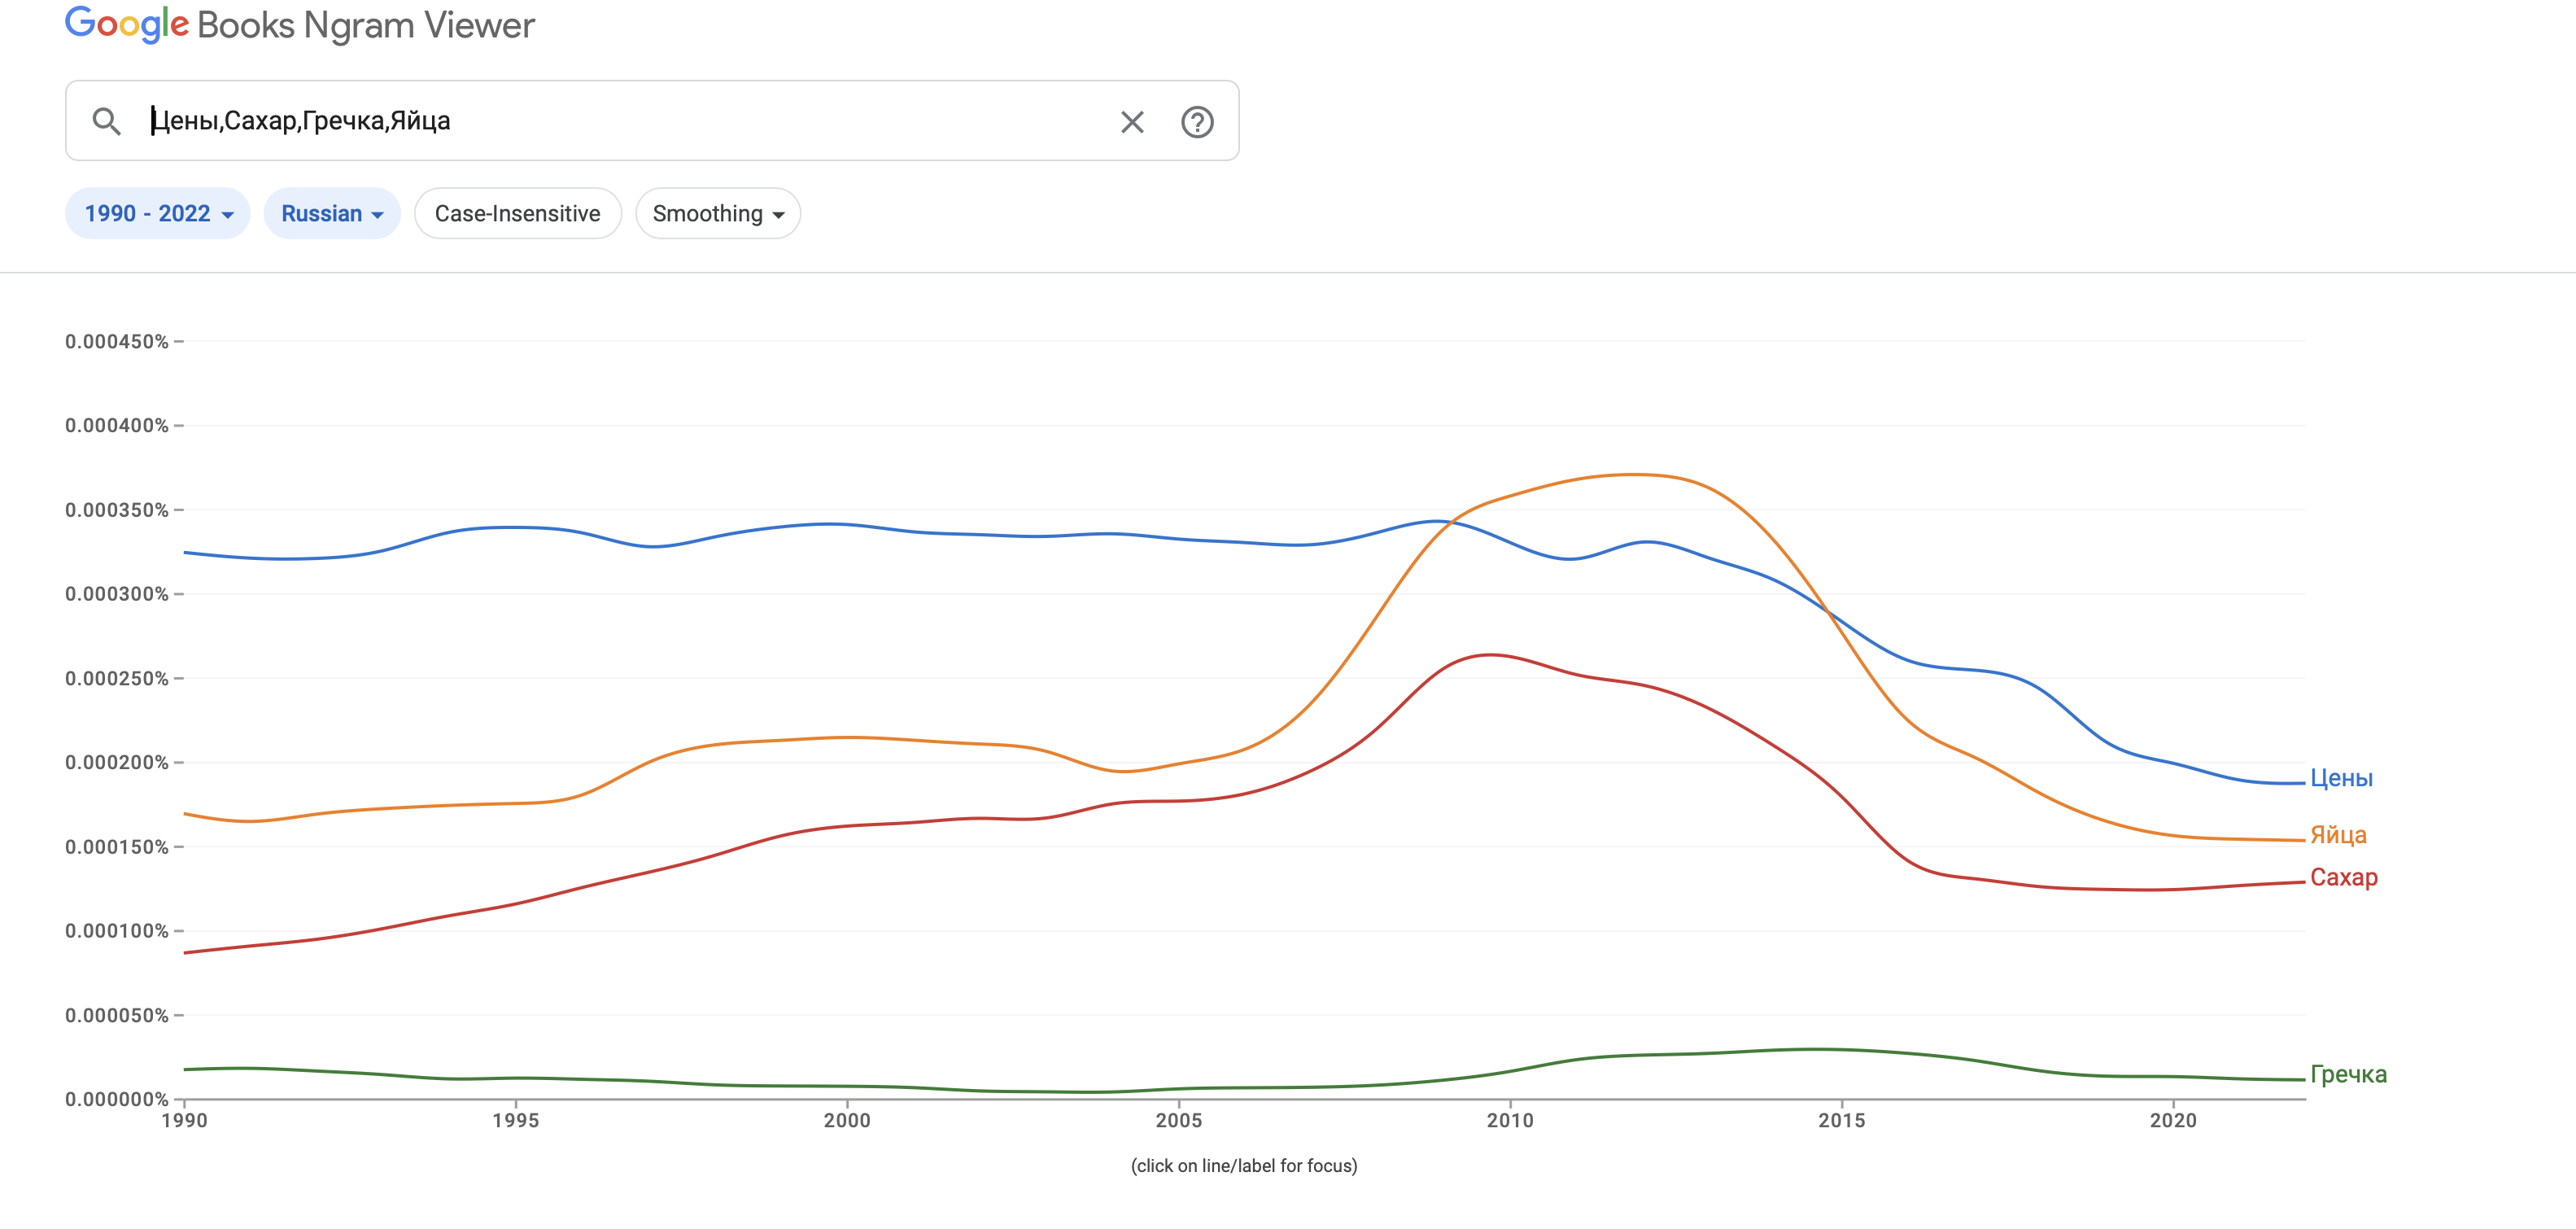

Из графика видно, что вечная проблема цен на сахар имеют и лингивистическую связь в отличи от гречки, которая хоть и имеет схожий тренд, однако уступает по популярности.

## Заданиe 3

Когда мы разбирали PMI мы использовали такую функцию:

In [ ]:
def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))
    except ZeroDivisionError:
        return 0
    return score

Но если вы посмотрите на определение в википедии, то увидите, что формула немного другая ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/094243d23c19d2d032f6bb26c4dc4f47d98d32f8)

Перепишите функцию, чтобы она точно соответствовала этому определению. Расчитайте PMI для всех биграммов также как мы делали в семинаре с помощью функции score_bigrams используя изначальный scorer и обновленный. Посмотрите есть ли разница в топ-10 биграммов. Подумайте почему результаты совпадают/отличаются?

*Подсказка: для вероятностей можно поделить на количество слов в корпусе

In [314]:
from math import log2
def scorer_pmi(word_count_a, word_count_b, bigram_count, total_words):
    p_x = word_count_a / total_words
    p_y = word_count_b / total_words
    p_xy = bigram_count / total_words
    try:
        pmi = log2(p_xy / (p_x * p_y))
    except ZeroDivisionError:
        return 0
    return pmi

протестируем

In [316]:
from collections import Counter

In [319]:
sentences = sent_tokenize(corpus, language='russian')
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences if not re.match(r'\W+', sentence)]
tokenized_sentences = [[w.lower() for w in s if not re.match(r'\W+', w)]  for s in tokenized_sentences ]

In [327]:
def ngrammer(tokens, n=2, stops=set()):
    ngrams = []
    tokens = [token for token in tokens if token not in stops]
    for i in range(0,len(tokens)-n+1):
        ngrams.append(' '.join(tokens[i:i+n]))
    return ngrams

In [333]:
def collect_stats(corpus, stops):
    ## соберем статистики для отдельных слов
    ## и биграммов

    unigrams = Counter()
    bigrams = Counter()

    for sent in corpus:
        unigrams.update(sent)
        bigrams.update(ngrammer(sent, 2, stops))

    return unigrams, bigrams

def score_bigrams(unigrams, bigrams, scorer, threshold=-100000):
    ## посчитаем метрику для каждого нграмма
    bigram2score = Counter()

    for bigram in bigrams:
        word_a, word_b = bigram.split()
        score = scorer(unigrams[word_a], unigrams[word_b],
                       bigrams[bigram], len(unigrams))

        ## если метрика выше порога, добавляем в словарик
        if score > threshold:
            bigram2score[bigram] = score

    return bigram2score

In [334]:
unigrams, bigrams = collect_stats(tokenized_sentences, russian_stopwords)

In [335]:
bigram2score = score_bigrams(unigrams, bigrams, scorer_pmi)

In [336]:
bigram2score.most_common(15)

[('сопоцкина друскеник', 16.930390849595785),
 ('неприятель приблизившись', 16.930390849595785),
 ('саноку обстреливалась', 16.930390849595785),
 ('показывался аэроплан-птица', 16.930390849595785),
 ('das ist', 16.930390849595785),
 ('ist nesteroff', 16.930390849595785),
 ('песнь нестерове', 16.930390849595785),
 ('доныне.так птице', 16.930390849595785),
 ('могучий унесся', 16.930390849595785),
 ('шумели лязгали', 16.930390849595785),
 ('зловеще гремели.и', 16.930390849595785),
 ('гремели.и пламенно', 16.930390849595785),
 ('жаждали битвы…величие', 16.930390849595785),
 ('равнине обманчиво-зыбкой.презрение', 16.930390849595785),
 ('воздушнойи дрогнуло', 16.930390849595785)]

## Задание 4*

Обновите функцию получившуюся в предыдущем задании так, чтобы вместо произведения/деления вероятностей использовались сложение и вычитание логирифмов.

In [ ]:
def scorer_pmi(word_count_a, word_count_b, bigram_count, total_words):
    p_x = word_count_a / total_words
    p_y = word_count_b / total_words
    p_xy = bigram_count / total_words

    try:
        pmi = log2(p_xy) - (log2(p_x) + log2(p_y))
    except ZeroDivisionError:
        return 0
    return pmi

## Задание 5

Исследуйте gensim.models.Phrases. Проверьте сколько дефолтных scoring функций есть в этом классе. Попробуйте все доступные по умолчанию scoring функции и попробуйте настраивать для них значение threshold и min_count. Попробуйте сделать так, чтобы собиралось как можно больше нграммов. Попробуйте строить последовательность gensim.models.Phrases, чтобы строить более длинные нграммы

Согласно официальной документации сущетвует 2 метода скоринга, но мы можем использовать и любую другую свою функцию


      scoring : {'default', 'npmi', function}, optional
      Specify how potential phrases are scored. `scoring` can be set with either a string that refers to a
      built-in scoring function, or with a function with the expected parameter names.
      Two built-in scoring functions are available by setting `scoring` to a string:
          #. "default" - :func:`~gensim.models.phrases.original_scorer`.
          #. "npmi" - :func:`~gensim.models.phrases.npmi_scorer`.

Построим биграммы и нграммы

In [245]:
def ngramm_count(grams, n='2'):
  # Создаем множество n-грамм для уникальных значений
  unique_grams = set(gram for sentence in grams for gram in sentence)

  # Выводим количество уникальных n-грамм
  gram_count = len(unique_grams)
  print(f"Количество уникальных {n}-грамм: {gram_count}")

In [ ]:
import gensim

In [287]:
sentences = sent_tokenize(corpus, language='russian')
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences if not re.match(r'\W+', sentence)]
tokenized_sentences = [[w.lower() for w in s if not re.match(r'\W+', w)]  for s in tokenized_sentences ]

In [288]:
sum([len(i) for i in tokenized_sentences]) # кол-во токенов

1430325

In [289]:
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=1,
                           threshold=1.,
                           scoring='default')
p = gensim.models.phrases.Phraser(ph)
ngramm_count(p[tokenized_sentences]) # кол-во биграмм для min_count=1, threshold=1.

Количество уникальных 2-грамм: 223388


In [290]:
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=1,
                           threshold=10.,
                           scoring='default')
p = gensim.models.phrases.Phraser(ph)
ngramm_count(p[tokenized_sentences]) # кол-во биграмм для min_count=1, threshold=10.

Количество уникальных 2-грамм: 189873


In [291]:
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=1,
                           threshold=1000,
                           scoring='default')
p = gensim.models.phrases.Phraser(ph)
ngramm_count(p[tokenized_sentences]) # кол-во биграмм для min_count=1, threshold=1000.

Количество уникальных 2-грамм: 138345


In [292]:
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=10,
                           threshold=1.,
                           scoring='default')
p = gensim.models.phrases.Phraser(ph)
ngramm_count(p[tokenized_sentences]) # кол-во биграмм для min_count=10, threshold=1

Количество уникальных 2-грамм: 133504


In [293]:
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=10,
                           threshold=10.,
                           scoring='default')
p = gensim.models.phrases.Phraser(ph)
ngramm_count(p[tokenized_sentences]) # кол-во биграмм для min_count=10, threshold=10

Количество уникальных 2-грамм: 129949


In [294]:
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=10,
                           threshold=1000.,
                           scoring='default')
p = gensim.models.phrases.Phraser(ph)
ngramm_count(p[tokenized_sentences]) # кол-во биграмм для min_count=10, threshold=1000

Количество уникальных 2-грамм: 125538


Можем заметить, что для биграмм с функций скринга default с ростом порога кол-во биграмм будет уменьшаться, как и  при увеличиении минимального кол-ва min_count будет сокращаться

Рассмотрим нграммы до 5

In [300]:
from tqdm import tqdm
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=1,
                           threshold=1.,
                           scoring='default')
p = gensim.models.phrases.Phraser(ph)
tok = p[tokenized_sentences]

for i in tqdm(range(2,5)):
  ph = gensim.models.Phrases(tok,
                           min_count=1,
                           threshold=1.,
                           scoring='default')
  p = gensim.models.phrases.Phraser(ph)
  tok = p[tok]
  ngramm_count(p[tok], n=i+1) # кол-во 5-грамм для min_count=1, threshold=1

 33%|███▎      | 1/3 [00:10<00:21, 10.94s/it]

Количество уникальных 3-грамм: 246313


 67%|██████▋   | 2/3 [00:24<00:12, 12.32s/it]

Количество уникальных 4-грамм: 247472


100%|██████████| 3/3 [00:42<00:00, 14.32s/it]

Количество уникальных 5-грамм: 247122


Рассмотрим второй алгоримт скоринга здесь порог будет иметь диапазон от -1 до 1

In [296]:
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=1,
                           threshold=1.,
                           scoring='npmi')
p = gensim.models.phrases.Phraser(ph)
ngramm_count(p[tokenized_sentences]) # кол-во биграмм для min_count=1, threshold=1.

Количество уникальных 2-грамм: 124898


In [297]:
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=1,
                           threshold=0.,
                           scoring='npmi')
p = gensim.models.phrases.Phraser(ph)
ngramm_count(p[tokenized_sentences])  # кол-во биграмм для min_count=1, threshold=0.

Количество уникальных 2-грамм: 414142


In [298]:
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=1,
                           threshold=-1.,
                           scoring='npmi')
p = gensim.models.phrases.Phraser(ph)
ngramm_count(p[tokenized_sentences])  # кол-во биграмм для min_count=1, threshold=-1.

Количество уникальных 2-грамм: 422514


Аналогично пред типу, чем ниже порог, тем больше будет биграмм, аналогичным образом будет влиять и min_count

Построим 5-грамм на npmi

In [299]:
from tqdm import tqdm
ph = gensim.models.Phrases(tokenized_sentences,
                           min_count=1,
                           threshold=-1.,
                           scoring='npmi')
p = gensim.models.phrases.Phraser(ph)
tok = p[tokenized_sentences]

for i in tqdm(range(2,5)):
  ph = gensim.models.Phrases(tok,
                           min_count=1,
                           threshold=-1.,
                           scoring='npmi')
  p = gensim.models.phrases.Phraser(ph)
  tok = p[tok]
  ngramm_count(p[tok], n=i+1) # кол-во 5-грамм для min_count=1, threshold=-1

 33%|███▎      | 1/3 [00:07<00:15,  7.65s/it]

Количество уникальных 3-грамм: 423133


 67%|██████▋   | 2/3 [00:17<00:09,  9.12s/it]

Количество уникальных 4-грамм: 387085


100%|██████████| 3/3 [00:28<00:00,  9.52s/it]

Количество уникальных 5-грамм: 365988


Мемасик за просроченный дедлайн p.s. вроде пару часов прощается... каюсь, переоценил свои силы, больше так не буду

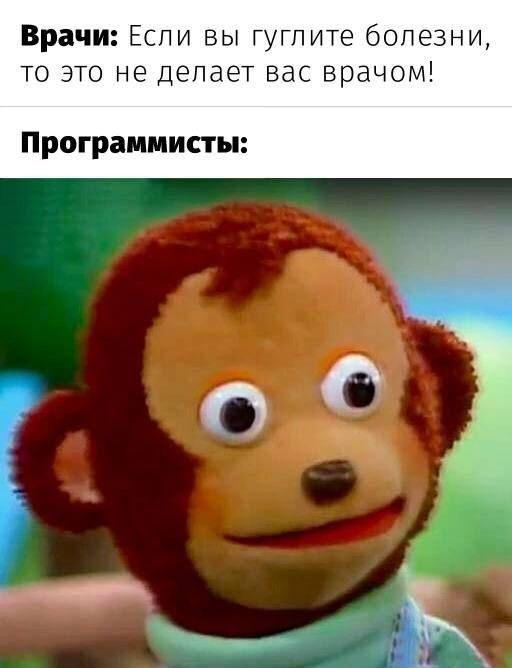